<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Imports-and-Functions" data-toc-modified-id="Imports-and-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Functions</a></span><ul class="toc-item"><li><span><a href="#Defining-the-Color-Palette" data-toc-modified-id="Defining-the-Color-Palette-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Defining the Color Palette</a></span></li><li><span><a href="#Similarity-Metrics-for-Registration" data-toc-modified-id="Similarity-Metrics-for-Registration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Similarity Metrics for Registration</a></span></li><li><span><a href="#Plot-Mean/Std-of-Correlation-Ratios-for-Image-and-Cohort" data-toc-modified-id="Plot-Mean/Std-of-Correlation-Ratios-for-Image-and-Cohort-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot Mean/Std of Correlation Ratios for Image and Cohort</a></span><ul class="toc-item"><li><span><a href="#Plot-the-correlation-ratio-means-and-standard-deviations-for-all-5-images" data-toc-modified-id="Plot-the-correlation-ratio-means-and-standard-deviations-for-all-5-images-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Plot the correlation ratio means and standard deviations for all 5 images</a></span></li></ul></li><li><span><a href="#Power-Threshold-Figures" data-toc-modified-id="Power-Threshold-Figures-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Power Threshold Figures</a></span></li><li><span><a href="#Calculate-Various-Metrics" data-toc-modified-id="Calculate-Various-Metrics-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Calculate Various Metrics</a></span></li></ul></li><li><span><a href="#Preprocess-Correlation-Ratio-Matrix-Files" data-toc-modified-id="Preprocess-Correlation-Ratio-Matrix-Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocess Correlation Ratio Matrix Files</a></span></li><li><span><a href="#Generate-Average-Correlation-Ratio-Barplot-Figures" data-toc-modified-id="Generate-Average-Correlation-Ratio-Barplot-Figures-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate Average Correlation Ratio Barplot Figures</a></span><ul class="toc-item"><li><span><a href="#Plot-the-means-and-standard-deviations-of-the-correlation-ratio-matrices-for-the-linearly-corrected-images" data-toc-modified-id="Plot-the-means-and-standard-deviations-of-the-correlation-ratio-matrices-for-the-linearly-corrected-images-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot the means and standard deviations of the correlation ratio matrices for the linearly corrected images</a></span></li><li><span><a href="#Plot-the-means-and-standard-deviations-of-the-correlation-ratio-matrices-for-the-nonlinearly-corrected-images" data-toc-modified-id="Plot-the-means-and-standard-deviations-of-the-correlation-ratio-matrices-for-the-nonlinearly-corrected-images-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot the means and standard deviations of the correlation ratio matrices for the nonlinearly corrected images</a></span></li><li><span><a href="#Plot-the-mean-and-standard-deviation-of-the-correlation-ratios-for-both-the-linearly-and-nonlinearly-registered-sequences" data-toc-modified-id="Plot-the-mean-and-standard-deviation-of-the-correlation-ratios-for-both-the-linearly-and-nonlinearly-registered-sequences-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot the mean and standard deviation of the correlation ratios for both the linearly and nonlinearly registered sequences</a></span></li></ul></li><li><span><a href="#Generate-Correlation-Ratio-Matrices" data-toc-modified-id="Generate-Correlation-Ratio-Matrices-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate Correlation Ratio Matrices</a></span></li><li><span><a href="#Correlation-Ratio-Matrices:-5-per-Figure" data-toc-modified-id="Correlation-Ratio-Matrices:-5-per-Figure-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation Ratio Matrices: 5 per Figure</a></span></li><li><span><a href="#Power-et-al-Threshold-Images" data-toc-modified-id="Power-et-al-Threshold-Images-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Power et al Threshold Images</a></span></li></ul></div>

# Imports and Functions

Purpose of this document: make figures for the HMM-based motion correction project

In [7]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
baseDir = '/home/jenna/Research/CHP-PIRC/markov-movement-correction/data/'
sns.set_style("white")

## Defining the Color Palette

Use seaborn to define the color palette for all figure generating functions

In [3]:
def defineColorPalette():
    """
    Use the seaborn library to define a better looking color palette.
    
    Currently takes no inputs, but that might change as I make more
    palettes
    
    Returns:
    - palette: the seaborn palette defined
    """
    # try using the xkcd_rgb colors
    # want 6 colors
    colors = ['blue', 'cherry red', 'golden yellow', 'vibrant green', 'violet', 'pumpkin orange']
    palette = sns.xkcd_palette(colors)
    
    return palette

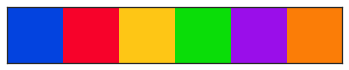

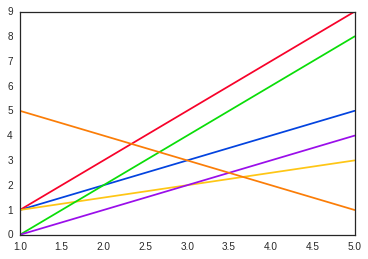

In [4]:
palette = defineColorPalette()
sns.palplot(palette)

# test plot
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [1, 3, 5, 7, 9]
y3 = [1, 1.5, 2, 2.5, 3]
y4 = [0, 2, 4, 6, 8]
y5 = [0, 1, 2, 3, 4]
y6 = [5, 4, 3, 2, 1]

fig = plt.figure()
sns.set_palette(palette)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.show()

## Similarity Metrics for Registration

- Correlation Ratio
- Mutual Information

plotTimeseriesSimilarities(): plot the signal comparing each timepoint to the first one in the temporal image

plotCorrelationMatrix(): read the correlation matrix from a csv file and plot it

plotCorrelationMatrices2(): read correlation matrics from 2 csv files and plot them

plotCorrelationMatrices4(): read correlation matrices from 4 csv files and plot them

plot


In [5]:
def plotTimeseriesSimilarities(timepoints, preReg, 
                               hmm, stackingHmm, signal4,
                               title='', ylabel='Similarity Metric',
                               simLabels=[], outFn=''):
    """
    Plot the similarity metric for each time point image to the
    template image for pre and post registration.
    
    The metrics are calculated using Raf's similarity.sh script.
    (Uses flirt)
    
    Inputs:
    - timepoints: the timepoints in the image
    - preReg: alignment of the images before registration
    - hmm: alignment of the images after HMM movement correction
    - stackingHmm: alignment of the images post stacking HMM 
                   movement correction
    - title: title for the graph
    - labels: the labels for the different signals
    - outFn: filename for the output (optional, leave empty if you
             don't want to save)
    
    Effects:
    - builds a graph that shows the similarities of each timepoint 
      image to the template image
    """
    sns.set_style("white")
    fig = plt.figure()
    
    # set the palette
    palette = defineColorPalette()
    sns.set_palette(palette)
    
    # put signals on graph
    print(simLabels)
    l1, = plt.plot(timepoints, preReg, label=simLabels[0])
    l2, = plt.plot(timepoints, hmm, label=simLabels[1])
    l3, = plt.plot(timepoints, stackingHmm, label=simLabels[2])
    l4, = plt.plot(timepoints, signal4, label=simLabels[3])
    
    # put legend on graph
    plt.legend(handles=[l1, l2, l3, l4], loc=2)
    
    plt.title(title)
    plt.xlabel('Timepoints')
    plt.ylabel(ylabel)
    
    plt.show()

    # saving the plot as an image
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight', dpi=600)

In [6]:
def plotCorrelationMatrix(fn, title="Cross Correlation Matrix",):
    """
    Given a filename, load the correlation matrix. Plot the given correlation matrix
    
    Inputs:
    - fn: the filename
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrix
    """
          
    # new figure
    fig = plt.figure()
    
    # subplot 1
    # load the matrix
    mat = np.loadtxt(open(fn, 'r'), delimiter=',')
    ax = fig.add_subplot(221)
    cax = ax.matshow(mat, cmap=plt.cm.gist_heat_r) # plasma_r looks cool, gist_heat_r is good
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(title)
    
    fig.colorbar(cax)
    
    plt.show()
    
def plotCorrelationMatrices2(fn1, fn2,
                          title1="Cross Correlation Matrix",
                          title2="Cross Correlation Matrix"):
    """
    Given a filename, load the correlation matrix. Plot the given correlation matrix
    
    Inputs:
    - fn: the filename
    - title: the optional title
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrices
    """
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')

    # calculate the vmin and vmax
    minVal = np.min([mat1.min(), mat2.min()])
    maxVal = np.max([mat1.max(), mat2.max()])
    
    
#     mat5 = np.loadtxt(open(fn2, 'r'), delimiter=',')

#     # calculate the vmin and vmax
#     minVal = np.min([mat1.min(), mat5.min()])
#     maxVal = np.max([mat1.max(), mat5.max()])
    
#     mat2 = np.full((len(mat1), len(mat1[0])), maxVal)
#     for i in xrange(len(mat5)):
#         for j in xrange(len(mat5[i])):
#             mat2[i][j] = mat5[i][j]
          
    # new figure
    fig = plt.figure(figsize=(20,10))
    
    # subplot 1
    ax1 = fig.add_subplot(121)
    cax1 = ax1.matshow(mat1, cmap=plt.cm.gist_heat_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title1)
    
    # subplot 2   
    ax2 = fig.add_subplot(122)
    cax2 = ax2.matshow(mat2, cmap=plt.cm.gist_heat_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_title(title2)
    
    
    # add the colorbar
    fig.colorbar(cax1, ax=[ax1, ax2])

    plt.show()
    
    

def plotCorrelationMatrices4(fn1, fn2, fn3, fn4, 
                          title1="Cross Correlation Matrix",
                          title2="Cross Correlation Matrix",
                          title3="Cross Correlation Matrix",
                          title4="Cross Correlation Matrix"):
    """
    Given a filename, load the correlation matrix. Plot the given correlation matrix
    
    Inputs:
    - fn: the filename
    - title: the optional title
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrices
    """
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')
    mat3 = np.loadtxt(open(fn3, 'r'), delimiter=',')
    mat4= np.loadtxt(open(fn4, 'r'), delimiter=',')

    # calculate the vmin and vmax
    minVal = np.min([mat1.min(), mat2.min(), mat3.min(), mat4.min()])
    maxVal = np.max([mat1.max(), mat2.max(), mat3.max(), mat4.max()])
    
    
#     mat5 = np.loadtxt(open(fn4, 'r'), delimiter=',')

#     # calculate the vmin and vmax
#     minVal = np.min([mat1.min(), mat2.min(), mat3.min(), mat5.min()])
#     maxVal = np.max([mat1.max(), mat2.max(), mat3.max(), mat5.max()])
    
#     mat4 = np.full((len(mat1), len(mat1[0])), maxVal)
#     for i in xrange(len(mat5)):
#         for j in xrange(len(mat5[i])):
#             mat4[i][j] = mat5[i][j]
          
    # new figure
    fig = plt.figure(figsize=(20,10))
    
   
    # subplot 1
    ax1 = fig.add_subplot(221)
    cax1 = ax1.matshow(mat1, cmap=plt.cm.gist_heat_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title1)
    
    # subplot 2   
    ax2 = fig.add_subplot(222)
    cax2 = ax2.matshow(mat2, cmap=plt.cm.gist_heat_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_title(title2)
    
    # subplot 3
    ax3 = fig.add_subplot(223)
    cax3 = ax3.matshow(mat3, cmap=plt.cm.gist_heat_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax3.xaxis.set_ticks_position('bottom')
    ax3.set_title(title3)
    
    # subplot 4
    ax4 = fig.add_subplot(224)
    cax4 = ax4.matshow(mat4, cmap=plt.cm.gist_heat_r, vmin=minVal, vmax=maxVal) # plasma_r looks cool, gist_heat_r is good
    ax4.xaxis.set_ticks_position('bottom')
    ax4.set_title(title4)
        
    # add the colorbar
    fig.subplots_adjust(wspace=0, hspace=0.25)
    fig.colorbar(cax1, ax=[ax1, ax2, ax3, ax4])
    
    
    plt.show()
    
    
    outFn = 'correlation-matrices-sample.jpg'
    fig.savefig(outFn, bbox_inches='tight')
    
def plotCorrelationMatrices4GivenCMapRange(fn1, fn2, fn3, fn4, cmapMin, cmapMax,
                          title1="Cross Correlation Matrix",
                          title2="Cross Correlation Matrix",
                          title3="Cross Correlation Matrix",
                          title4="Cross Correlation Matrix",
                          outFn=""):
    """
    Given a filename, load the correlation matrix. Plot the given correlation matrix
    
    Inputs:
    - fn: the filename
    - title: the optional title
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrices
    """
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')
    mat3 = np.loadtxt(open(fn3, 'r'), delimiter=',')
    mat4= np.loadtxt(open(fn4, 'r'), delimiter=',')
          
    # new figure
    fig = plt.figure(figsize=(14,10))
    
   
    # subplot 1
    ax1 = fig.add_subplot(221)
    cax1 = ax1.matshow(mat1, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title1)
    
    # subplot 2   
    ax2 = fig.add_subplot(222)
    cax2 = ax2.matshow(mat2, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_title(title2)
    
    # subplot 3
    ax3 = fig.add_subplot(223)
    cax3 = ax3.matshow(mat3, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax3.xaxis.set_ticks_position('bottom')
    ax3.set_title(title3)
    
    # subplot 4
    ax4 = fig.add_subplot(224)
    cax4 = ax4.matshow(mat4, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax4.xaxis.set_ticks_position('bottom')
    ax4.set_title(title4)
        
    # add the colorbar
    fig.subplots_adjust(wspace=0, hspace=0.25)
    fig.colorbar(cax1, ax=[ax1, ax2, ax3, ax4])
    
    
    plt.show()
    
    if not outFn == "":
        fig.savefig(outFn, bbox_inches='tight')
    

## Plot Mean/Std of Correlation Ratios for Image and Cohort

In [26]:
def plotCorrelationMatrices3GivenCMapRange(fn1, fn2, fn3, cmapMin, cmapMax,
                          title1="Cross Correlation Matrix",
                          title2="Cross Correlation Matrix",
                          title3="Cross Correlation Matrix",
                          outFn=""):
    """
    Given a filename, load the correlation matrix. Plot the given correlation matrix
    
    Inputs:
    - fn: the filename
    - title: the optional title
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrices
    """
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')
    mat3 = np.loadtxt(open(fn3, 'r'), delimiter=',')
    
#     # calculate the vmin and vmax
#     cmapMin = np.min([mat1.min(), mat2.min(), mat3.min()])
#     cmapMax = np.max([mat1.max(), mat2.max(), mat3.max()])
          
    # new figure
    fig = plt.figure(figsize=(14,5))
   
    # subplot 1
    ax1 = fig.add_subplot(131)
    cax1 = ax1.matshow(mat1, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title1)
    
    # subplot 2   
    ax2 = fig.add_subplot(132)
    cax2 = ax2.matshow(mat2, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_title(title2)
    
    # subplot 3
    ax3 = fig.add_subplot(133)
    cax3 = ax3.matshow(mat3, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax3.xaxis.set_ticks_position('bottom')
    ax3.set_title(title3)
        
    # add the colorbar
#     fig.subplots_adjust(wspace=0, hspace=0.05)
    fig.colorbar(cax1, ax=[ax1, ax2, ax3])
    
    plt.show()
    
    if not outFn == "":
        fig.savefig(outFn, bbox_inches='tight', dpi=600)
    

In [35]:
def plotCorrelationMatrices5GivenCMapRange(fn1, fn2, fn3, fn4, fn5, cmapMin, cmapMax,
                          title1="Correlation Matrix",
                          title2="Correlation Matrix",
                          title3="Correlation Matrix",
                          title4="Correlation Matrix",
                          title5="Correlation Matrix",
                          outFn=""):
    """
    Takes 5 filenames, colormap min and max values, 5 graph titles, and an output filename
    
    Read in the correlation ratio matrices from the files
    Plot all 5 correlation ratio matrices in 1 figure following the layout
    
    +---------+----+----+  +-+
    |         |    |    |  | |
    |         |  2 |  3 |  | |
    |    1    |----+----+  | |
    |         |    |    |  | |
    |         |  4 |  5 |  | |
    +---------+----+----+  +-+
    
    where the bar on the side is the colorbar
    
    If an output function is specified, save the graph to a file.
    
    Inputs:
    - fn1, fn2, fn3, fn4, fn5: the filenames of the correlation ratio matrices
    - cmapMin: minimum value to use for the colormap
    - cmapMax: maximum value to use for the colormap
    - title1, title2, title3, title4, title5: titles to put on the graph for each matrix
    - outFn (optional): filename to save the graph to
    
    Returns:
    - nothing
    
    Effects:
    - displays the 5 correlation matrices in a single figure
    """
    
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')
    mat3 = np.loadtxt(open(fn3, 'r'), delimiter=',')
    mat4 = np.loadtxt(open(fn4, 'r'), delimiter=',')
    mat5 = np.loadtxt(open(fn5, 'r'), delimiter=',')
          
    # new figure
    fig = plt.figure(figsize=(14,5))
    
    # set up subplots
    outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)
    
    # set up the subsubplots
    left = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], wspace=0.1, hspace=0.2)
    right = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer[1], wspace=0.2, hspace=0.5)
    
    # display the original correlation ratio matrix
    axOrig = plt.Subplot(fig, left[0])
    caxOrig = axOrig.matshow(mat1, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    axOrig.xaxis.set_ticks_position('bottom')
    axOrig.set_title(title1)
    fig.add_subplot(axOrig)
    
    # display the correlation ratio matrices from the registered images
    # global affine
    axGlobLin = plt.Subplot(fig, right[0])
    caxGlobLin = axGlobLin.matshow(mat2, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    axGlobLin.xaxis.set_ticks_position('bottom')
    axGlobLin.set_title(title2)
    fig.add_subplot(axGlobLin)
    
    # global nonlinear  
    axGlobNonLin = plt.Subplot(fig, right[1])
    caxGlobNonLin = axGlobNonLin.matshow(mat3, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    axGlobNonLin.xaxis.set_ticks_position('bottom')
    axGlobNonLin.set_title(title3)
    fig.add_subplot(axGlobNonLin)
    
    # DAG affine
    axDagLin = plt.Subplot(fig, right[2])
    caxDagLin = axDagLin.matshow(mat4, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    axDagLin.xaxis.set_ticks_position('bottom')
    axDagLin.set_title(title4)
    fig.add_subplot(axDagLin)
    
    # DAG nonlinear  
    axDagNonLin = plt.Subplot(fig, right[3])
    caxDagNonLin = axDagNonLin.matshow(mat5, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    axDagNonLin.xaxis.set_ticks_position('bottom')
    axDagNonLin.set_title(title5)
    fig.add_subplot(axDagNonLin)
        
    # add the colorbar
#     fig.subplots_adjust(wspace=0, hspace=0.05), 
    fig.colorbar(caxOrig, ax=[axOrig, axGlobLin, axGlobNonLin, axDagLin, axDagNonLin])
    
    plt.show()
    
    if not outFn == "":
        fig.savefig(outFn, bbox_inches='tight', dpi=600)
    

In [9]:
def plotCohortCorrelationStats(fns):
    """
    Given a list of lists of filenames
    
    Inputs:
    - fns: list of lists of filenames
    
    Returns: None
    
    Effects:
    - Plot boxplots with mean and standard deviation lines for
      all 4 methods for all subjects
    """
    # initializing variables
    titles = ['Averge Correlation Ratio for Original BOLD MR Images',
              'Averge Correlation Ratio for Images Corrected to the First Volume',
              'Averge Correlation Ratio for Images Corrected Using HMM-based Motion Correction',
              'Averge Correlation Ratio for Images Corrected Using Parallelized HMM-based Correction']
    outFns = ["figures/boxplot-orig.pdf",
              "figures/boxplot-first.pdf",
              "figures/boxplot-hmm.pdf",
              "figures/boxplot-stacking.pdf"]
    means = []
    stds = []
    
    # calculate the mean and standard deviation lines
    for i in xrange(len(fns[0])):
        subjFns = [fns[0][i], fns[1][i], fns[2][i], fns[3][i]]  # collect the filename associated with a subject
        m, s = calculateAverageCorrelationRatioStats(subjFns)
        means.append(m)
        stds.append(s)
    
    # turn the standard deviations into upper/lower boundary lines
    upper = [means[i]+stds[i] for i in xrange(len(stds))]
    lower = [means[i]-stds[i] for i in xrange(len(stds))]
    
    # plot each boxplot plot for each method
    for i in xrange(len(fns)):
#         plotMethodCorrelationStats(fns[i], means, upper, lower, titles[i])
        plotMethodCorrelationStats(fns[i], means, upper, lower, titles[i], outFn=outFns[i])

In [10]:
def plotCorrelationStatsAll(fns, outFn=''):
    """
    Given a list of lists of filenames
    
    Inputs:
    - fns: list of lists of filenames
    
    Returns: None
    
    Effects:
    - Plot boxplots with mean and standard deviation lines for
      all 4 methods for all subjects
    """
    # initializing variables
    titles = ['Averge Correlation Ratio for Original BOLD MR Images',
              'Averge Correlation Ratio for Images Corrected to the First Volume',
              'Averge Correlation Ratio for Images Corrected Using HMM-based Motion Correction',
              'Averge Correlation Ratio for Images Corrected Using Parallelized HMM-based Correction']
    outFns = ["figures/boxplot-orig.pdf",
              "figures/boxplot-first.pdf",
              "figures/boxplot-hmm.pdf",
              "figures/boxplot-stacking.pdf"]
    means = []
    stds = []
    
    # calculate the mean and standard deviation lines
    for i in xrange(len(fns[0])):
        subjFns = [fns[0][i], fns[1][i], fns[2][i], fns[3][i]]  # collect the filename associated with a subject
        m, s = calculateAverageCorrelationRatioStats(subjFns)
        means.append(m)
        stds.append(s)
    
    # turn the standard deviations into upper/lower boundary lines
    upper = [means[i]+stds[i] for i in xrange(len(stds))]
    lower = [means[i]-stds[i] for i in xrange(len(stds))]
    
    fig = plt.figure(figsize=(10,6))
    
    # set the color palette
    colors = ['blue', 'darkish red', 'toxic green', 'violet']
    palette = sns.xkcd_palette(colors)
    sns.set_palette(palette)
    
    # plot the lines
    x = range(len(means))
    x = [i+1 for i in x]
    c = sns.xkcd_palette(['grey'])[0]
    plt.plot(x, means, color=c, linestyle='-')
    plt.plot(x, upper, color=c, linestyle='--')
    plt.plot(x, lower, color=c, linestyle='--')
    
    # plot each errorbars for each method
    for i in xrange(len(fns[0])):
        # original BOLD image
        mu, sigma = calculateCorrelationRatioStats(fns[0][i])
        h1 = plt.errorbar(i+1-0.2, mu, sigma, linestyle='None', markersize=8, marker='o')
        # correction to first timepoint
        mu, sigma = calculateCorrelationRatioStats(fns[1][i])
        h2 = plt.errorbar(i+1-0.07, mu, sigma, linestyle='None', markersize=8, marker='^')
        # hmm-based correction
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h3 = plt.errorbar(i+1.07, mu, sigma, linestyle='None', markersize=8, marker='s')
        # stacking hmm-based correction
        mu, sigma = calculateCorrelationRatioStats(fns[3][i])
        h4 = plt.errorbar(i+1.2, mu, sigma, linestyle='None', markersize=8, marker='*')
        
            
    plt.xlim([0.5, len(fns[0])+1.5])
#     plt.ylim([0, 0.2])
    plt.title('Average Correlation Ratio for All Correction Methods')
    plt.xlabel('Subject')
    plt.ylabel('Average Correlation Ratio')
    plt.legend(handles=[h1, h2, h3, h4], labels=['None', 'First Volume', 'HMM', 'Parallelized HMM'])
    
    plt.show()
    
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight', dpi=600)   

In [11]:
def plotCorrelationStatsThree(fns, outFn=''):
    """
    Given a list of lists of filenames
    
    Inputs:
    - fns: list of lists of filenames
    
    Returns: None
    
    Effects:
    - Plot boxplots with mean and standard deviation lines for
      three methods for all subjects
    """
    # initializing variables
    titles = ['Averge Correlation Ratio for Original BOLD MR Images',
              'Averge Correlation Ratio for Images Corrected to the First Volume',
              'Averge Correlation Ratio for Images Corrected Using HMM-based Motion Correction']
#     outFns = ["figures/boxplot-orig.pdf",
#               "figures/boxplot-first.pdf",
#               "figures/boxplot-hmm.pdf"]
    means = []
    stds = []
    
    # calculate the mean and standard deviation lines
    for i in xrange(len(fns[0])):
        subjFns = [fns[0][i], fns[1][i], fns[2][i]]  # collect the filename associated with a subject
        ms = [0.0, 0.0, 0.0]
        ss = [0.0, 0.0, 0.0]
    
        # calculate the values
        for j in xrange(len(subjFns)):
            m, s = calculateCorrelationRatioStats(subjFns[j])
            ms[j] = m
            ss[j] = s

        means.append(np.mean(ms))
        stds.append(np.mean(ss))
    
    # turn the standard deviations into upper/lower boundary lines
    upper = [means[i]+stds[i] for i in xrange(len(stds))]
    lower = [means[i]-stds[i] for i in xrange(len(stds))]
    
    fig = plt.figure(figsize=(10,6))
    
    # set the color palette
    colors = ['blue', 'bright red', 'yellowish orange']
    palette = sns.xkcd_palette(colors)
    sns.set_palette(palette)
    
    # plot the lines
    x = range(len(means))
    x = [i+1 for i in x]
    c = sns.xkcd_palette(['grey'])[0]
    plt.plot(x, means, color=c, linestyle='-')
    plt.plot(x, upper, color=c, linestyle='--')
    plt.plot(x, lower, color=c, linestyle='--')
    
    # plot each errorbars for each method
    for i in xrange(len(fns[0])):
        # original BOLD image
        mu, sigma = calculateCorrelationRatioStats(fns[0][i])
        h1 = plt.errorbar(i+1-0.2, mu, sigma, linestyle='None', markersize=8, marker='o')
        # correction to first timepoint
        mu, sigma = calculateCorrelationRatioStats(fns[1][i])
        h2 = plt.errorbar(i+1, mu, sigma, linestyle='None', markersize=8, marker='^')
        # hmm-based correction
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h3 = plt.errorbar(i+1.2, mu, sigma, linestyle='None', markersize=8, marker='s')        
            
    plt.xlim([0.5, len(fns[0])+0.5])
#     plt.ylim([0, 0.2])
    plt.title('Average Correlation Ratio for All Correction Methods')
    plt.xlabel('Subject')
    plt.ylabel('Average Correlation Ratio')
    plt.legend(handles=[h1, h2, h3], labels=['None', 'First Volume', 'HMM'])
    
    plt.show()
    
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight', dpi=600)   

### Plot the correlation ratio means and standard deviations for all 5 images

In [86]:
def plotCorrelationStatsFive(fns, outFn=''):
    """
    Given a list of lists of filenames...
    
    Inputs:
    - fns: list of lists of filenames
    
    Returns: None
    
    Effects:
    - Plot boxplots with mean and standard deviation lines for
      three methods for all subjects
    """
    #----- Initializing variables
    titles = ['Correlation Ratio for Original Sequence',
              'Correlation Ratio for Global Affine Registration',
              'Correlation Ratio for Global Nonlinear Registration',
              'Correlation Ratio for DAG Affine Registration',
              'Correlation Ratio for DAG Nonlinear Registration']
    
    stds = []
    
    #----- Calculate the mean and standard deviations 
    for i in xrange(len(fns[0])): # for each subject
        # collect the correlation ratio matrix filename associated with a subject
        subjFns = [fns[0][i], fns[1][i], fns[2][i]]  
        ms = [0.0, 0.0, 0.0, 0.0, 0.0]
        ss = [0.0, 0.0, 0.0, 0.0, 0.0]
    
        # calculate the mean and standard deviation for each correlation ratio matrix
        for j in xrange(len(subjFns)):
            m, s = calculateCorrelationRatioStats(subjFns[j])
            ms[j] = m
            ss[j] = s

        means.append(np.mean(ms))
        stds.append(np.mean(ss))
    
    #----- Turn the standard deviations into upper/lower boundary lines
    upper = [means[i]+stds[i] for i in xrange(len(stds))]
    lower = [means[i]-stds[i] for i in xrange(len(stds))]
    
    #----- Make the figure
    fig = plt.figure(figsize=(12,6))
    
    # set the color palette
    #colors = ['blue', 'bright red', 'bright red', 'yellowish orange', 'yellowish orange']
    #colors = ['black', 'medium grey', 'medium grey', 'light blue grey', 'light blue grey']
    colors = ['cobalt blue', 'cerulean blue', 'cerulean blue', 'neon blue', 'neon blue']
    palette = sns.xkcd_palette(colors)
    sns.set_palette(palette)
    
    '''
    # plot the grey range lines
    x = range(len(means))
    x = [i+1 for i in x]
    c = sns.xkcd_palette(['grey'])[0]
    plt.plot(x, means, color=c, linestyle='-')
    plt.plot(x, upper, color=c, linestyle='--')
    plt.plot(x, lower, color=c, linestyle='--')
    '''
    
    # plot each errorbar for each method
    for i in xrange(len(fns[0])):
        # original BOLD image
        mu, sigma = calculateCorrelationRatioStats(fns[0][i])
        h1 = plt.errorbar(i+1-0.3, mu, sigma, linestyle='None', markersize=8, marker='o')
        # global affine
        mu, sigma = calculateCorrelationRatioStats(fns[1][i])
        h2 = plt.errorbar(i+1-.15, mu, sigma, linestyle='None', markersize=8, marker='^')
        h2[-1][0].set_linestyle('-.')
        # global nonlinear
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h3 = plt.errorbar(i+1, mu, sigma, linestyle='None', markersize=8, marker='s')        
        # dag affine
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h4 = plt.errorbar(i+1.15, mu, sigma, linestyle='None', markersize=8, marker='^')  
        h4[-1][0].set_linestyle('-.')
        # dag nonlinear
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h5 = plt.errorbar(i+1.3, mu, sigma, linestyle='None', markersize=8, marker='s')        
    
    # Draw light grey lines to separate the subjects
    c = sns.xkcd_palette(['grey'])[0]
    for i in xrange(len(fns[0])-1):
        plt.axvline(x=i+1.5, color=c)
            
    plt.xlim([0.5, len(fns[0])+0.5])
#     plt.ylim([0, 0.2])
    plt.title('Average Correlation Ratios for All Registration Methods')
    plt.xlabel('Subject')
    plt.ylabel('Average Correlation Ratio')
    plt.legend(handles=[h1, h2, h3, h4, h5], 
               labels=['None', 'Global Affine', 'Global Nonlinear', 'DAG Affine', 'DAG Nonlinear'],
               frameon=True)
    
    plt.show()
    
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight', dpi=600)   

In [66]:
def plotMethodCorrelationStats(matFns, meanLine, upperBound, lowerBound, title="Average Correlation Ratio for Method", outFn=""):
    
    fig = plt.figure()
    
    colors = ['blue']
    palette = sns.xkcd_palette(colors)
    sns.set_palette(palette)
    
    # plot the lines
    x = range(len(meanLine))
    plt.plot(x, meanLine, color='r', linestyle='-')
    plt.plot(x, upperBound, color='r', linestyle='--')
    plt.plot(x, lowerBound, color='r', linestyle='--')
    
    # plot the errorbars
    for i in xrange(len(matFns)):
        mu, sigma = calculateCorrelationRatioStats(matFns[i])
        plt.errorbar(i, mu, sigma, linestyle='None', marker='o')
        
    plt.title(title)
    plt.xlabel('Subject')
    plt.ylabel('Average Correlation Ratio')
    
    plt.show()
    
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight')
        

## Power Threshold Figures

Not currently used!

In [13]:
import csv

def plotPowerThresholds(dispFn, intFn, saveFn=""):
    """
    Open the files, load the displacement and intensity changes,
    and plot the displacement vs. intensity scatterplot. Also
    plot red lines to show the Power et al. displacement and 
    intensity thresholds.
    
    Inputs:
    - dispFn: filename of the displacement changes
    - intFn: filename of the intensity changes
    """
    fig = plt.figure()

    # load .csv files
    with open(dispFn, 'r') as dispFile:
        reader = csv.reader(dispFile, delimiter="\n")
        displacementChanges = [float(val) for sublist in list(reader) for val in sublist]

    with open(intFn, 'r') as intFile:
        reader = csv.reader(intFile, delimiter="\n")
        intensityChanges = [float(val) for sublist in list(reader) for val in sublist]
        
    print(len(displacementChanges))

    # plot the loaded data
    plt.plot(intensityChanges, displacementChanges,'b.')
    
    xMax = max(intensityChanges)*1.05
    yMax = max(displacementChanges)*1.05

    # adding threshold lines
    plt.plot([0, xMax], [2, 2], 'r-') 
    plt.plot([25, 25], [0, yMax], 'r-')
    
    plt.xlim([0, xMax])
    plt.ylim([0, yMax])

    plt.xlabel("Change in Voxel Intensity Between Volumes (units)")
    plt.ylabel("Displacement Between Volumes (mm)")
    plt.title("Between Volume Displacement Change vs. Voxel Intensity Change")

    fig.show()
    
    if not saveFn == "":
        fig.savefig(saveFn, bbox_inches='tight')

In [14]:
def plotPowerThresholdsAll(dispFns, intFns, titles, saveFn=""):
    """
    Open the files, load the displacement and intensity changes,
    and plot the displacement vs. intensity scatterplot. Also
    plot red lines to show the Power et al. displacement and 
    intensity thresholds. Do this for all 4 motion correction
    methods
    
    Inputs:
    - dispFns: list of filenames of the displacement changes
    - intFns: list of filenames of the intensity changes
    - titles: list of titles
    - saveFn: filename to save the figure to
    """
    
    # checking inputs
    if len(dispFns) != 4 or len(intFns) != 4 or len(titles) != 4:
        print("Invalid inputs: must be lists of length 4")
        return -1
        
    fig, axes = plt.subplots(2, 2, figsize=(10,10))
    
    subPlots = []
    for i, row in enumerate(axes):
        for j, ax in enumerate(row):
            subPlots.append(ax)
    
    for i in xrange(4):    
        # load .csv files
        with open(dispFns[i], 'r') as dispFile:
            reader = csv.reader(dispFile, delimiter="\n")
            displacementChanges = [float(val) for sublist in list(reader) for val in sublist]

        with open(intFns[i], 'r') as intFile:
            reader = csv.reader(intFile, delimiter="\n")
            intensityChanges = [float(val) for sublist in list(reader) for val in sublist]

        # plot the loaded data
        subPlots[i].plot(intensityChanges, displacementChanges,'b.')

        xMax = max(intensityChanges)*1.05
        yMax = max(displacementChanges)*1.05

        # adding threshold lines
        subPlots[i].plot([0, xMax], [2, 2], 'r-') 
        subPlots[i].plot([25, 25], [0, yMax], 'r-')

        subPlots[i].set_xlim([0, xMax])
        subPlots[i].set_ylim([0, yMax])

        subPlots[i].set_xlabel("Change in Voxel Intensity Between Volumes (units)")
        subPlots[i].set_ylabel("Displacement Between Volumes (mm)")
        subPlots[i].set_title(titles[i])

    fig.show()
    
    if not saveFn == "":
        fig.savefig(saveFn, bbox_inches='tight')

In [15]:
def plotPowerThresholdsAllImages(dispFns, intFns, title, saveFn=""):
    """
    Open the files, load the displacement and intensity changes,
    and plot the displacement vs. intensity scatterplot. Also
    plot red lines to show the Power et al. displacement and 
    intensity thresholds.
    
    Inputs:
    - dispFn: filename of the displacement changes
    - intFn: filename of the intensity changes
    """
    fig = plt.figure()
    
    displacements = []
    intensities = []
    
    for dispFn in dispFns:
        # load .csv files
        with open(dispFn, 'r') as dispFile:
            reader = csv.reader(dispFile, delimiter="\n")
            displacementChanges = [float(val) for sublist in list(reader) for val in sublist]
            displacements.extend(displacementChanges)

    for intFn in intFns:
        with open(intFn, 'r') as intFile:
            reader = csv.reader(intFile, delimiter="\n")
            intensityChanges = [float(val) for sublist in list(reader) for val in sublist]
            intensities.extend(intensityChanges)
        
    # plot the loaded data
    plt.plot(intensities, displacements,'b.')
    print(len(intensities), len(displacements))
    
    xMax = max(intensities)*1.05
    yMax = max(displacements)*1.05

    # adding threshold lines
    plt.plot([0, xMax], [2, 2], 'r-') 
    plt.plot([25, 25], [0, yMax], 'r-')
    
    plt.xlim([0, xMax])
    plt.ylim([0, yMax])

    plt.xlabel("Change in Voxel Intensity Between Volumes (units)")
    plt.ylabel("Displacement Between Volumes (mm)")
    plt.title(title)

#     fig.show()
    
    if not saveFn == "":
        fig.savefig(saveFn, bbox_inches='tight')

## Calculate Various Metrics

In [16]:
def calculateCorrelationRatioStats(fn):
    """
    Given a filename, read in the cross correlation file for the image.
    Average the cross correlation value for the entire image.
    
    Inputs:
    - fn: the filename to load
    
    Returns:
    - avgCross: the average cross correlation
    - stddev: the standard deviation of the cross correlation
    """
    # load file
    mat = np.loadtxt(open(fn, 'r'), delimiter=',')
    
    # return the average
    avgCross = mat.mean()
    stddev = mat.std()
    return avgCross, stddev

In [17]:
def calculateAverageCorrelationRatioStats(fns):
    """
    Given a list of filenames, calculate the mean and standard
    deviation correlation ratios for each of them. Then calculate
    the mean of the mean and the standard deviations.
    
    This information will be used to 
    
    Inputs:
    - fns: list of filenames
    
    Returns:
    - avgAvgCorrel: average average of the correlation ratios for 
                    all 4 methods for a single subject
    - avgStdCorrel: average standard deviation of the correlation ratios
                    for all 4 methods for a single subject
    """
    
    means = [0.0, 0.0, 0.0, 0.0]
    stds = [0.0, 0.0, 0.0, 0.0]
    
    # calculate the values
    for i in xrange(len(fns)):
        m, s = calculateCorrelationRatioStats(fns[i])
        means[i] = m
        stds[i] = s
        
    avgAvgCorrel = np.mean(means)
    avgStdCorrel = np.mean(stds)
    
    return avgAvgCorrel, avgStdCorrel

# Preprocess Correlation Ratio Matrix Files

List all the filenames, determine the mean and standard deviation of the correlation ratios, and sort the all files by highest correlation ratio in the original sequence to the lowest correlation ratio in the original sequence

Specify the correlation matrix files

In [20]:
origCorrelationMatricesLinear = ["data/LinearControls/0434_TC_077/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0473_TC_070_02a/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0068/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0533_TC_068_01a/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0039/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0013/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0493_TC_079_01a/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0321_TC_057_01a/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0784_TC_015/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0785_TC_016/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0799_TC_031/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0096/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0794_TC_026/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0114-2/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0116-2/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0093/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0119/metrics/crossCorrelation-timepoints.csv"]

firstCorrelationMatricesLinear = ["data/LinearControls/0434_TC_077/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0473_TC_070_02a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0068/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0533_TC_068_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0039/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0013/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0493_TC_079_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0321_TC_057_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0784_TC_015/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0785_TC_016/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0799_TC_031/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0096/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0794_TC_026/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0114-2/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0116-2/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0093/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0119/metrics/crossCorrelation-firstTimepoint.csv"]

hmmCorrelationMatricesLinear = ["data/LinearControls/0434_TC_077/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0473_TC_070_02a/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0068/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0533_TC_068_01a/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0039/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0013/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0493_TC_079_01a/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0321_TC_057_01a/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0784_TC_015/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0785_TC_016/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0799_TC_031/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0096/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0794_TC_026/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0114-2/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0116-2/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0093/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0119/metrics/crossCorrelation-hmm.csv"]

origCorrelationMatricesNonlinear = ["data/Controls/0434_TC_077/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0473_TC_070_02a/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0068/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0533_TC_068_01a/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0039/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0013/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0493_TC_079_01a/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0321_TC_057_01a/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0784_TC_015/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0785_TC_016/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0799_TC_031/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0096/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0794_TC_026/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0114-2/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0116-2/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0093/metrics/crossCorrelation-timepoints.csv", 
"data/Controls/0119/metrics/crossCorrelation-timepoints.csv"]

firstCorrelationMatricesNonlinear = ["data/Controls/0434_TC_077/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0473_TC_070_02a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0068/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0533_TC_068_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0039/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0013/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0493_TC_079_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0321_TC_057_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0784_TC_015/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0785_TC_016/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0799_TC_031/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0096/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0794_TC_026/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0114-2/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0116-2/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0093/metrics/crossCorrelation-firstTimepoint.csv", 
"data/Controls/0119/metrics/crossCorrelation-firstTimepoint.csv"]

hmmCorrelationMatricesNonlinear = ["data/Controls/0434_TC_077/metrics/crossCorrelation-hmm.csv",
"data/Controls/0473_TC_070_02a/metrics/crossCorrelation-hmm.csv",
"data/Controls/0068/metrics/crossCorrelation-hmm.csv",
"data/Controls/0533_TC_068_01a/metrics/crossCorrelation-hmm.csv",
"data/Controls/0039/metrics/crossCorrelation-hmm.csv",
"data/Controls/0013/metrics/crossCorrelation-hmm.csv",
"data/Controls/0493_TC_079_01a/metrics/crossCorrelation-hmm.csv",
"data/Controls/0321_TC_057_01a/metrics/crossCorrelation-hmm.csv",
"data/Controls/0784_TC_015/metrics/crossCorrelation-hmm.csv",
"data/Controls/0785_TC_016/metrics/crossCorrelation-hmm.csv",
"data/Controls/0799_TC_031/metrics/crossCorrelation-hmm.csv",
"data/Controls/0096/metrics/crossCorrelation-hmm.csv",
"data/Controls/0794_TC_026/metrics/crossCorrelation-hmm.csv",
"data/Controls/0114-2/metrics/crossCorrelation-hmm.csv",
"data/Controls/0116-2/metrics/crossCorrelation-hmm.csv",
"data/Controls/0093/metrics/crossCorrelation-hmm.csv",
"data/Controls/0119/metrics/crossCorrelation-hmm.csv"]

Check to make sure the linear and nonlinear orginal correlation matrices are the same (if they don't, you have a problem and should rerun the correlation ratio calculations).

In [21]:
allMatricesMatch = True

for subjLinear, subjNonlinear in zip(origCorrelationMatricesLinear, origCorrelationMatricesNonlinear):
    linearMatrix = np.loadtxt(open(subjLinear, 'r'), delimiter=',')
    nonlinearMatrix = np.loadtxt(open(subjNonlinear, 'r'), delimiter=',')
    
    if not np.array_equal(linearMatrix, nonlinearMatrix):
        print("Matrices not equal!")
        print(subjLinear)
        print(subjNonlinear)
        print()
        allMatricesMatch = False
        
if allMatricesMatch:
    print("All correlation ratio matrices match!")     
        

All correlation ratio matrices match!


Sort the files according to the subjects with the highest to lowest average correlation ratio in the original rs-fMRI sequence.

In [22]:
# read in files
means = []
stds = []
origMeans = []

for i in xrange(len(origCorrelationMatricesLinear)):
    subjFns = [origCorrelationMatricesLinear[i], firstCorrelationMatricesLinear[i], hmmCorrelationMatricesLinear[i]]  # collect the filename associated with a subject
    # calculate the mean and standard deviation
    m, s = calculateCorrelationRatioStats(subjFns[0])
    means.append(m)
    stds.append(s)

# sort the subjects according to the means
origMatricesLinearSorted = list(reversed([subj for i, subj in sorted(zip(means, origCorrelationMatricesLinear))]))
firstMatricesLinearSorted = list(reversed([subj for i, subj in sorted(zip(means, firstCorrelationMatricesLinear))]))
hmmMatricesLinearSorted = list(reversed([subj for i, subj in sorted(zip(means, hmmCorrelationMatricesLinear))]))
origMatricesNonlinearSorted = list(reversed([subj for i, subj in sorted(zip(means, origCorrelationMatricesNonlinear))]))
firstMatricesNonlinearSorted = list(reversed([subj for i, subj in sorted(zip(means, firstCorrelationMatricesNonlinear))]))
hmmMatricesNonlinearSorted = list(reversed([subj for i, subj in sorted(zip(means, hmmCorrelationMatricesNonlinear))]))

print("The correlation ratio matrices have been ordered!")

The correlation ratio matrices have been ordered!


# Generate Average Correlation Ratio Barplot Figures

Make barplots for linearly or nonlinearly registered images (change file names)

Make barplots for nonlinearly and linearly registered images

## Plot the means and standard deviations of the correlation ratio matrices for the linearly corrected images

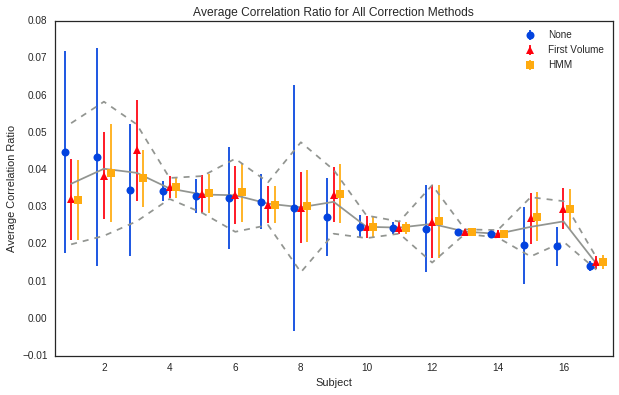

In [43]:
plotCorrelationStatsThree([origMatricesLinearSorted, firstMatricesLinearSorted, hmmMatricesLinearSorted])#,
#                         outFn='figures/boxplot-three.png')

## Plot the means and standard deviations of the correlation ratio matrices for the nonlinearly corrected images

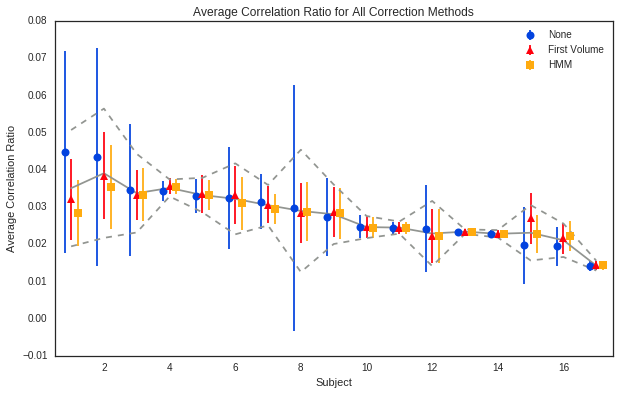

In [23]:
plotCorrelationStatsThree([origMatricesNonlinearSorted, firstMatricesNonlinearSorted, hmmMatricesNonlinearSorted])#,
#                         outFn='figures/boxplot-three-nonlinear.png')

Note: at this point, the blue circle lines in the previous 2 graphs should be the same. If they aren't, double check to make sure that the correlation ratio matrices were sorted and passed the check to make sure the linear/nonlinear correlation ratio matrices for the original images were the same.

## Plot the mean and standard deviation of the correlation ratios for both the linearly and nonlinearly registered sequences 

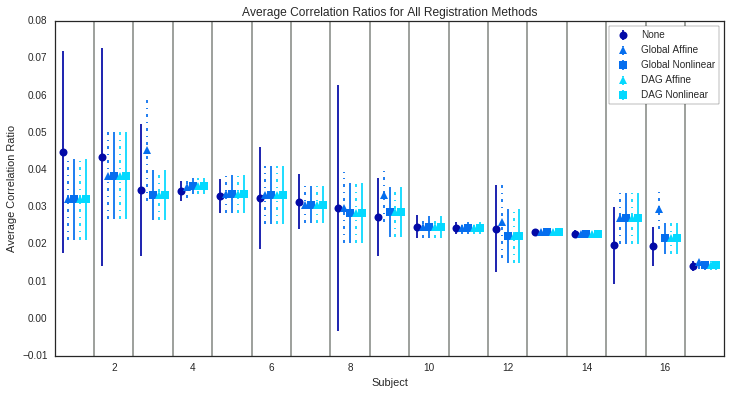

In [87]:
# code here
plotCorrelationStatsFive([origMatricesNonlinearSorted, 
                           firstMatricesLinearSorted,
                           firstMatricesNonlinearSorted,
                           hmmMatricesLinearSorted,
                           hmmMatricesNonlinearSorted],
                           outFn='figures/boxplot-5.png')


# Generate Correlation Ratio Matrices

Plot the correlation ratio matrices for the best and the worst correlation ratio means.

In [24]:
# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.extend(origMatricesLinearSorted)
fns.extend(firstMatricesLinearSorted)
fns.extend(hmmMatricesLinearSorted)
fns.extend(origMatricesNonlinearSorted)
fns.extend(firstMatricesNonlinearSorted)
fns.extend(hmmMatricesNonlinearSorted)

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)

0.0119091 0.314643


Subject 0: Highest average correlation ratio

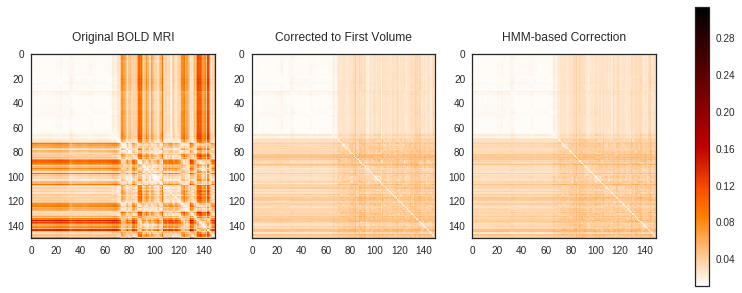

Average cross correlation for each version of motion correction:
  None:                              (0.044756910693333325, 0.027066824932752611)
  Corrected to First Volume:         (0.032030863702222218, 0.010968445820450924)
  HMM-based Correction:              (0.031940666395555553, 0.010823673499286484)


In [56]:
# Subject 0
subjID = 0
saveFn = "figures/correlMatrix-subj00-Linear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         hmmMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original BOLD MRI", title2="Corrected to First Volume",
                         title3="HMM-based Correction",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesLinearSorted[subjID]))


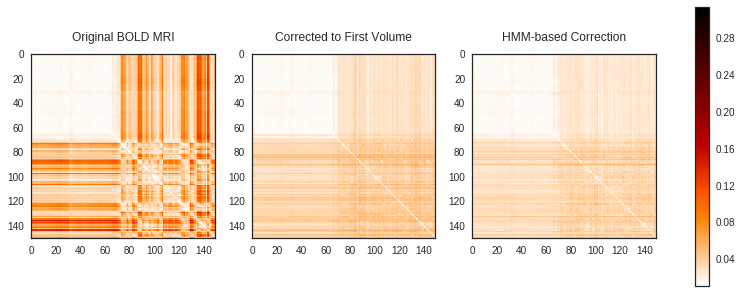

Average cross correlation for each version of motion correction:
  None:                              (0.044756910693333325, 0.027066824932752611)
  Corrected to First Volume:         (0.032030863702222218, 0.010968445820450924)
  HMM-based Correction:              (0.028381370155555554, 0.0088870552637311251)


In [57]:
# Subject 0
subjID = 0
saveFn = "figures/correlMatrix-subj00-Nonlinear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesNonlinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         hmmMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original BOLD MRI", title2="Corrected to First Volume",
                         title3="HMM-based Correction",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesNonlinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesNonlinearSorted[subjID]))


Subject 7: Median average correlation ratio

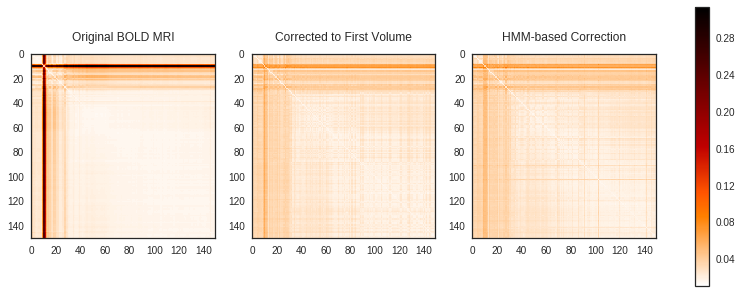

Average cross correlation for each version of motion correction:
  None:                              (0.029697818977777776, 0.033137967677094843)
  Corrected to First Volume:         (0.029855986271111114, 0.0095750235399048485)
  HMM-based Correction:              (0.030254282626666667, 0.0096910745375478561)


In [63]:
# Subject 7
subjID = 7
saveFn = "figures/correlMatrix-subj07-Linear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         hmmMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original BOLD MRI", title2="Corrected to First Volume",
                         title3="HMM-based Correction",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesLinearSorted[subjID]))


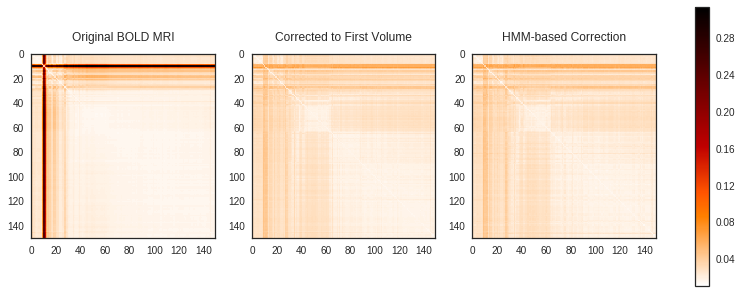

Average cross correlation for each version of motion correction:
  None:                              (0.029697818977777776, 0.033137967677094843)
  Corrected to First Volume:         (0.028373460440000001, 0.0081478562581752834)
  HMM-based Correction:              (0.028773344871111113, 0.0080390805452189157)


In [64]:
# Subject 7
subjID = 7
saveFn = "figures/correlMatrix-subj07-Nonlinear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesNonlinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         hmmMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original BOLD MRI", title2="Corrected to First Volume",
                         title3="HMM-based Correction",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesNonlinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesNonlinearSorted[subjID]))


Subject 16: Lowest average correlation ratio

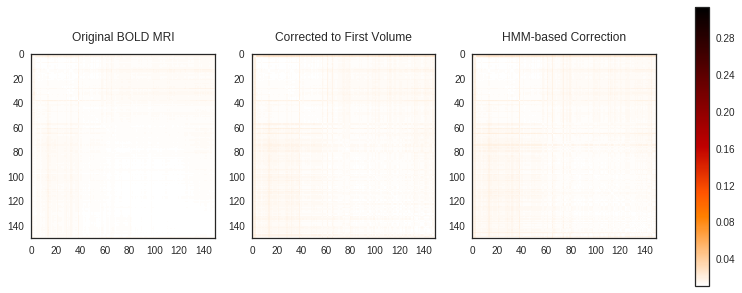

Average cross correlation for each version of motion correction:
  None:                              (0.014135785182222223, 0.0013309549421507644)
  Corrected to First Volume:         (0.01512181852888889, 0.0017762662064697559)
  HMM-based Correction:              (0.015196954248888889, 0.0018419419275387209)


In [65]:
# Subject 16
subjID = 16
saveFn = "figures/correlMatrix-subj16-Linear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         hmmMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original BOLD MRI", title2="Corrected to First Volume",
                         title3="HMM-based Correction",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesLinearSorted[subjID]))


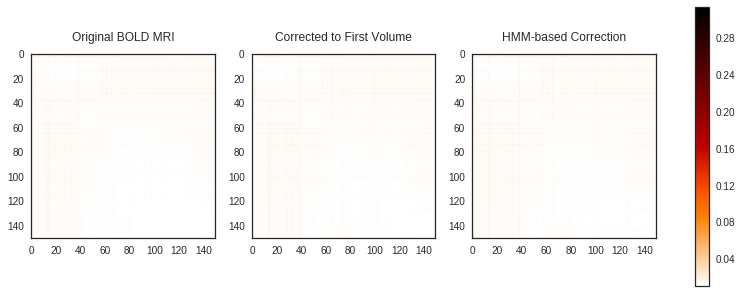

Average cross correlation for each version of motion correction:
  None:                              (0.014135785182222223, 0.0013309549421507644)
  Corrected to First Volume:         (0.014280802360000002, 0.0013242938408546427)
  HMM-based Correction:              (0.014299244422222222, 0.0013174610256191008)


In [66]:
# Subject 16
subjID = 16
saveFn = "figures/correlMatrix-subj16-Nonlinear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesNonlinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         hmmMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original BOLD MRI", title2="Corrected to First Volume",
                         title3="HMM-based Correction",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesNonlinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesNonlinearSorted[subjID]))


# Correlation Ratio Matrices: 5 per Figure

Put both the affine/nonlinear correlation ratio matrices and the original correlation ratio matrices in the same figure

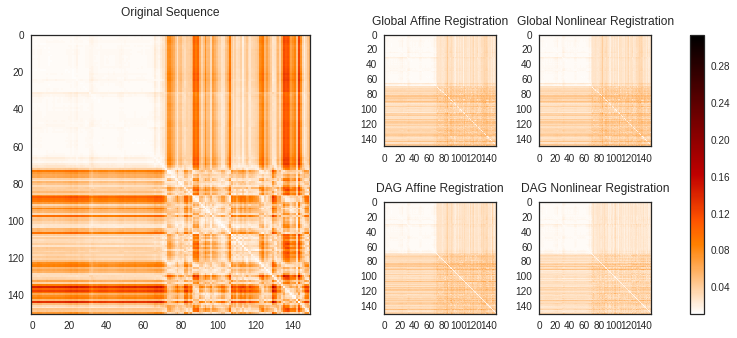

Average cross correlation for each version of motion correction:
  None:                              (0.044756910693333325, 0.027066824932752611)
  Corrected to First Volume:         (0.032030863702222218, 0.010968445820450924)
  HMM-based Correction:              (0.031940666395555553, 0.010823673499286484)


In [88]:
# testing the plot 5 correlation matrices function
# Subject 0
subjID = 0
saveFn = "figures/correlMatrix-subj00-All.png"
cmap = plotCorrelationMatrices5GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         hmmMatricesLinearSorted[subjID],
                         hmmMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="Global Affine Registration",
                         title3="Global Nonlinear Registration", title4="DAG Affine Registration",
                         title5="DAG Nonlinear Registration",
                         outFn=saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesLinearSorted[subjID]))


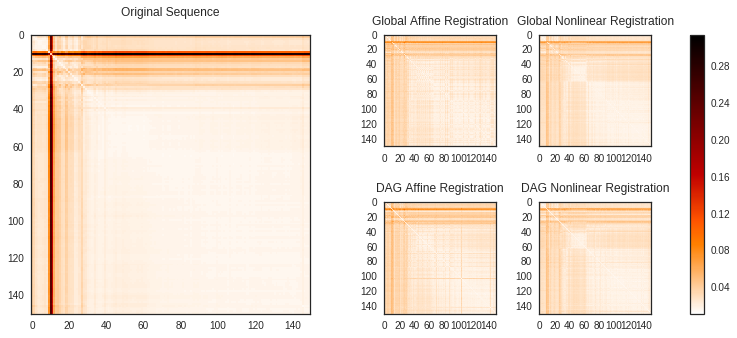

Average cross correlation for each version of motion correction:
  None:                              (0.029697818977777776, 0.033137967677094843)
  Corrected to First Volume:         (0.029855986271111114, 0.0095750235399048485)
  HMM-based Correction:              (0.030254282626666667, 0.0096910745375478561)


In [89]:
# Subject 8
subjID = 7
saveFn = "figures/correlMatrix-subj07-All.png"
cmap = plotCorrelationMatrices5GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         hmmMatricesLinearSorted[subjID],
                         hmmMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="Global Affine Registration",
                         title3="Global Nonlinear Registration", title4="DAG Affine Registration",
                         title5="DAG Nonlinear Registration",
                         outFn=saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesLinearSorted[subjID]))


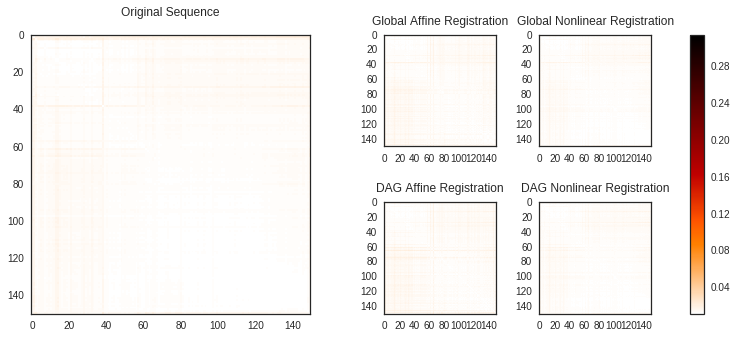

Average cross correlation for each version of motion correction:
  None:                              (0.014135785182222223, 0.0013309549421507644)
  Corrected to First Volume:         (0.01512181852888889, 0.0017762662064697559)
  HMM-based Correction:              (0.015196954248888889, 0.0018419419275387209)


In [90]:
# Subject 17
subjID = 16
saveFn = "figures/correlMatrix-subj16-All.png"
cmap = plotCorrelationMatrices5GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         hmmMatricesLinearSorted[subjID],
                         hmmMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="Global Affine Registration",
                         title3="Global Nonlinear Registration", title4="DAG Affine Registration",
                         title5="DAG Nonlinear Registration",
                         outFn=saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                             ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Corrected to First Volume:        ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  HMM-based Correction:             ", calculateCorrelationRatioStats(hmmMatricesLinearSorted[subjID]))


# Power et al Threshold Images

Written using dummy numbers

Not currently used

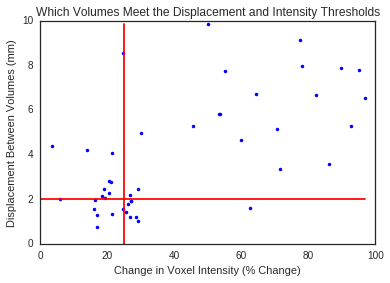

In [203]:
from random import uniform

fig = plt.figure()

# generating and plotting fake data

x = [uniform(15, 30) for i in range(20)]
y = [uniform(1, 3) for i in range(20)]
plt.plot(x, y, 'b.')

x = [uniform(0, 100) for i in range(25)]
y = [uniform(0, 10) for i in range(25)]
plt.plot(x, y, 'b.')

# adding threshold lines
plt.plot([0, max(x)], [2, 2], 'r-') 
plt.plot([25, 25], [0, max(y)], 'r-')

plt.xlabel("Change in Voxel Intensity (% Change)")
plt.ylabel("Displacement Between Volumes (mm)")
plt.title("Which Volumes Meet the Displacement and Intensity Thresholds")

fig.show()

fig.savefig("figures/power-thresholds.png", bbox_inches='tight')


150


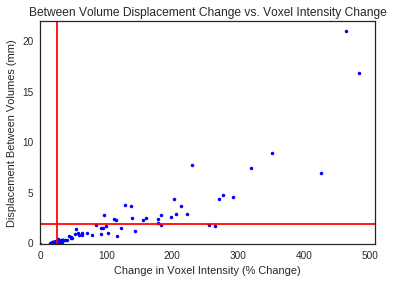

In [46]:
dispFilename = baseDir+'LinearControls/0013/metrics/BOLD-displacement-metrics.csv'
intFilename = baseDir+'LinearControls/0013/metrics/BOLD-intensity-metrics.csv'

plotPowerThresholds(dispFilename, intFilename)


In [74]:
subjList = ["0013",
            "0039",
            "0068",
            "0093",
            "0096",
            "0114-2",
            "0116-2",
            "0119",
            "0321_TC_057_01a",
            "0434_TC_077",
            "0473_TC_070_02a",
            "0493_TC_079_01a",
            "0533_TC_068_01a",
            "0784_TC_015",
            "0785_TC_016",
            "0794_TC_026",
            "0799_TC_031"]

methodList = [["BOLD", "BOLD"],
              ["First Volume", "corrected_firstTimepoint"],
              ["HMM", "corrected_hmm"],
              ["Parallelized HMM", "corrected_stacking_hmm"]]

for subj in subjList:
    titles = ["Between Volume Displacement vs. Between Volume Voxel Intensity Change: \n"+method[0] for method in methodList]
    dispFilenames = [baseDir+'LinearControls/'+subj+'/metrics/'+method[1]+'-displacement-metrics.csv' for method in methodList]
    intFilenames = [baseDir+'LinearControls/'+subj+'/metrics/'+method[1]+'-intensity-metrics.csv' for method in methodList]
    plotPowerThresholdsAll(dispFilenames, intFilenames, titles)

4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4


2550 2550
2533 2533
2550 2550
2550 2550


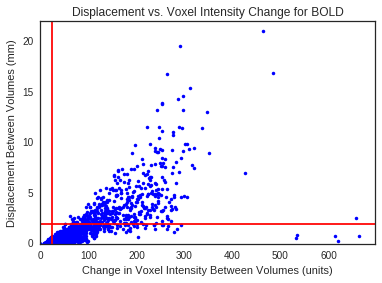

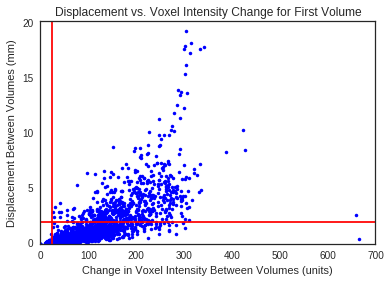

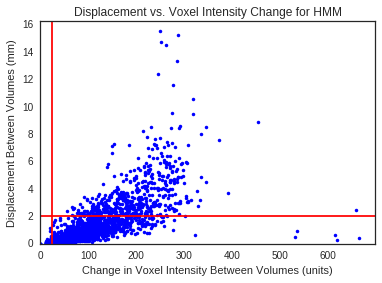

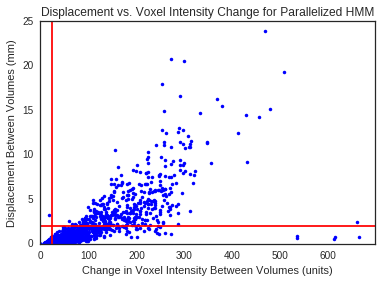

In [78]:
for method in methodList:
    dispFilenames = [baseDir+'LinearControls/'+subj+'/metrics/'+method[1]+'-displacement-metrics.csv' for subj in subjList]
    intFilenames = [baseDir+'LinearControls/'+subj+'/metrics/'+method[1]+'-intensity-metrics.csv' for subj in subjList]
    title = "Displacement vs. Voxel Intensity Change for " + method[0]
    outFn = baseDir+'figures/powerThresholdAll-'+method[1]+'.png'
    plotPowerThresholdsAllImages(dispFilenames, intFilenames, title, saveFn=outFn)